In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import solve_ivp
from scipy.optimize import fsolve
import seaborn as sns
sns.set_theme(style="ticks", font_scale=2)
import os
import json
from datetime import datetime
import inspect
import os
import sys
sys.path.append('../Classes')
from my_model_class import Model
from my_solving_class import Solving


import colorsys
import matplotlib.colors as mcolors

In [35]:
m1 = Model()
s1 = Solving(m1)

tree_is_options = ['both']
tree_is_labels = ['Both']
linestyles = {'both': '-'}
m1.params['tree'] = True
m1.params['tree_is'] = 'both'
betaA = m1.params['beta_A']
betaT = m1.params['beta_T']
tc=0.2
S_border=np.linspace(0, 1, 100)

red = ['#fda2b7', '#d10333', '#6c011a']
blue = ['#71c8fc', '#0484d0', '#02456c']
# red = '#d10333'
# blue = '#0484d0'
# blue2 = '#71c8fc'

# plt.rc('axes', titlesize=12, labelsize=12)  # title and axis labels
# plt.rc('legend', fontsize=10)               # legend text

# Paper plot

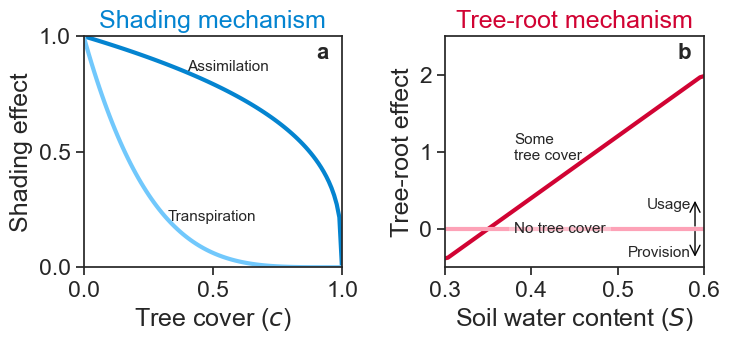

In [67]:
fig, axes = plt.subplots(1, 2, figsize=(8, 3))
fig.subplots_adjust(wspace=0.4)
ax0, ax1 = axes

tree_water_values = s1.solve_treewater(tc, S_border)


# ax1.text(0.4, 0.95, rf'$c={tc:.2f}$', 
#          fontsize=11, verticalalignment='top', 
#          horizontalalignment='center')

# ax1.text(0.4, -0.05, r'$c=0.00$',
#          fontsize=11, verticalalignment='top',
#          horizontalalignment='center')

assimilation, transpiration = s1.solve_sh_of_TC(betaA=betaA, betaT=betaT)
ax0.plot(S_border, assimilation, linestyle='-', color=blue[1], label='Assimilation', lw=3)
ax0.plot(S_border, transpiration, linestyle='-', color=blue[0], label='Transpiration', lw=3)

ax0.text(0.4, 0.85, 'Assimilation', fontsize=11)
ax0.text(0.325, 0.2, 'Transpiration', fontsize=11)

ax0.set(xticks=[0, 0.5, 1],
        yticks=[0, 0.5, 1],
        xlim=(0, 1),
        ylim=(0, 1.0),
        xlabel=r"Tree cover ($\mathit{c}$)",
        ylabel="Shading effect",
        )
ax0.set_title("Shading mechanism", color=blue[1], )

ax0.text(0.9, 0.9, 'a', transform=ax0.transAxes, fontsize=16, weight='bold')


ax1.plot(S_border, tree_water_values, color=red[1], lw=3)
ax1.axhline(0, color=red[0], linewidth=3)

# ax1.text(0.49, 0.02, 'Usage', 
#          verticalalignment='bottom', 
#          horizontalalignment='left', fontsize=11)
xpos = 0.59
ax1.annotate('', xy=(xpos, 0.0), xytext=(xpos, -0.40),
                 arrowprops=dict(color='black',arrowstyle="<-"))
ax1.annotate('', xytext=(xpos, 0.0), xy=(xpos, 0.4),
                 arrowprops=dict(color='black',arrowstyle="->"))
ax1.text(xpos-0.005, 0.4, 'Usage', va='top', ha='right', fontsize=11)
ax1.text(xpos-0.005, -0.4, 'Provision', va='bottom', ha='right', fontsize=11)

ax1.set(xlabel=r"Soil water content ($\mathit{S}$)",
        ylabel="Tree-root effect",
        xlim=(0.3, 0.6),
        ylim=(-0.5, 2.5))

ax1.set_title("Tree-root mechanism", color=red[1])

ax1.text(0.38, 1.25, 'Some\ntree cover',
         fontsize=11, verticalalignment='top', 
         horizontalalignment='left',
        #  bbox=dict(facecolor='white', alpha=0.3, edgecolor='none')
         )
ax1.text(
        0.38, 0.00, 'No tree cover',
        fontsize=11, va='center', ha='left',
        bbox=dict(facecolor='white', alpha=0.3, edgecolor='none')
)
ax1.text(0.9, 0.9, 'b', transform=ax1.transAxes, fontsize=16, weight='bold')



fig.savefig('Assumptions.png', dpi=300, bbox_inches='tight')
fig.savefig('Assumptions.pdf', bbox_inches='tight')

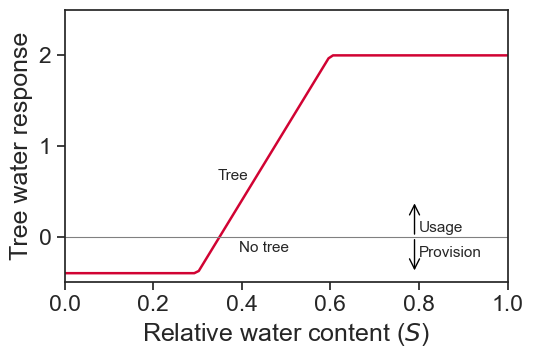

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import copy                      # <- new

# ------------------------------------------------------------------
# 1) Build the *working* base model exactly as you did before
# ------------------------------------------------------------------
base_model = Model()
base_model.params['tree'] = True          # keep the tree on
# (add here any other tweaks you had, e.g. beta_A, beta_T, …)

tc  = 0.2
S   = np.linspace(0, 1, 100)

# ------------------------------------------------------------------
# 2) Plot three variants, cloning the base each time
# ------------------------------------------------------------------
# tree_is_options = ['use', 'pro', 'both']
# red_shades      = ['#f28ba8', '#d10333', '#8b0a2d']
# labels          = ['Usage only', 'Provision only', 'Both']

tree_is_options = ['both']
red_shades      = ['#d10333']
labels          = ['Both']

fig, ax1 = plt.subplots(figsize=(6, 4))

for mode, shade, lab in zip(tree_is_options, red_shades, labels):
    m_loop = copy.deepcopy(base_model)        # pristine copy
    m_loop.params['tree_is'] = mode           # *only* this changes
    
    s_loop = Solving(m_loop)                  # fresh solver on the copy
    y      = s_loop.solve_treewater(tc, S)
    
    ax1.plot(S, y, color=shade, lw=1.8, label=lab)

# ------------------------------------------------------------------
# 3) Add back the baseline, arrows, labels, axes, legend
# ------------------------------------------------------------------
ax1.axhline(0, color='gray', lw=0.8)

# Usage / Provision arrows
ax1.text(0.8,  0.02, 'Usage',     ha='left',  va='bottom', fontsize=11)
ax1.annotate('', xy=(0.79,  0.40), xytext=(0.79, 0.00),
             arrowprops=dict(color='black', arrowstyle='->'))
ax1.text(0.8, -0.10, 'Provision', ha='left',  va='top',    fontsize=11)
ax1.annotate('', xy=(0.79, -0.40), xytext=(0.79, 0.00),
             arrowprops=dict(color='black', arrowstyle='->'))

# Tree / No-tree labels
ax1.text(0.38, 0.75,  'Tree',    ha='center', va='top', fontsize=11)
ax1.text(0.45, -0.05, 'No tree', ha='center', va='top', fontsize=11)

# Panel label
# ax1.text(0.9, 0.9, 'b', transform=ax1.transAxes, fontsize=14)

# Axes cosmetics
ax1.set(xlabel=r"Relative water content ($\mathit{S}$)",
        ylabel="Tree water response",
        # title="Hydraulic-redistribution",
        xlim=(0, 1),
        ylim=(-0.5, 2.5))

# ax1.legend(frameon=False, loc='upper left', fontsize=11)
fig.tight_layout()

fig.savefig('Assumptions_ax1_sup.png', dpi=300, bbox_inches='tight')
fig.savefig('Assumptions_ax1_sup.pdf', bbox_inches='tight')



[Text(0.5, 0, 'Relative water content ($\\mathit{S}$)'),
 Text(0, 0.5, 'Tree water response'),
 Text(0.5, 1.0, 'Hydraulic-redistribution'),
 (0.0, 1.0),
 (-0.5, 2.5)]

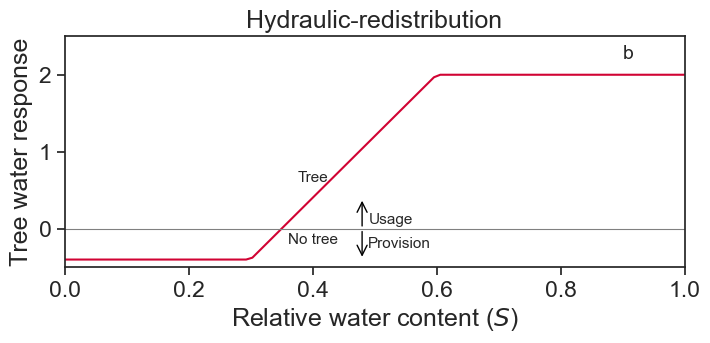

In [11]:
fig, ax1 = plt.subplots(figsize=(8, 3))

tree_water_values = s2.solve_treewater(tc, S_border)

ax1.plot(S_border, tree_water_values, color=red)
ax1.axhline(0, color='gray', linewidth=0.8)

ax1.text(0.49, 0.02, 'Usage', 
         verticalalignment='bottom', 
         horizontalalignment='left', fontsize=11)
ax1.annotate('', xy=(0.48, 0.4), xytext=(0.48, 0.00),
                 arrowprops=dict(color='black',arrowstyle="->"))
ax1.text(0.49, -0.1, 'Provision', 
         verticalalignment='top', 
         horizontalalignment='left', fontsize=11)
ax1.annotate('', xytext=(0.48, 0.0), xy=(0.48, -0.4),
                 arrowprops=dict(color='black',arrowstyle="->"))

ax1.text(0.4, 0.75, 'Tree', 
         fontsize=11, verticalalignment='top', 
         horizontalalignment='center')

ax1.text(0.4, -0.05, 'No tree',
         fontsize=11, verticalalignment='top',
         horizontalalignment='center')

ax1.text(0.9, 0.9, 'b', transform=ax1.transAxes, fontsize=14)

ax1.set(xlabel=r"Relative water content ($\mathit{S}$)",
        ylabel="Tree water response",
        title="Hydraulic-redistribution",
        xlim=(0., 1),
        ylim=(-0.5, 2.5))

# fig.savefig('Assumptions_ax1.png', dpi=300, bbox_inches='tight')
# fig.savefig('Assumptions_ax1.pdf', bbox_inches='tight')


# Other plots, such as for teary presentation

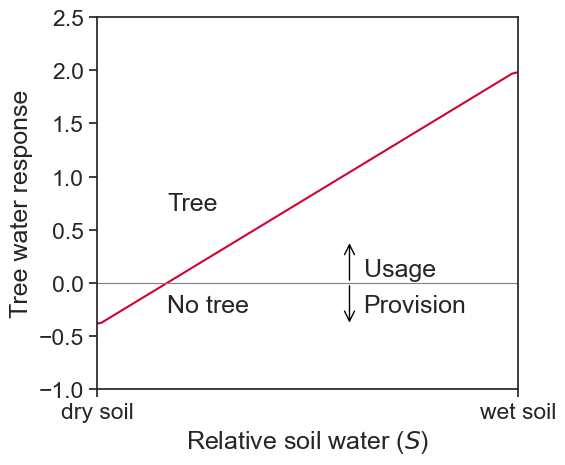

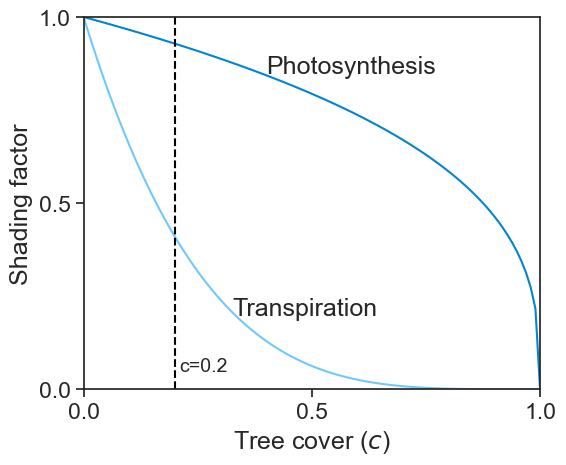

In [5]:
# First figure - Tree water response
fig1, ax0 = plt.subplots(figsize=(6, 5))

tree_water_values = s1.solve_treewater(tc, S_border)

ax0.plot(S_border, tree_water_values, color=red)
ax0.axhline(0, color='gray', linewidth=0.8)

ax0.text(0.49, 0.02, 'Usage', 
                 verticalalignment='bottom', 
                 horizontalalignment='left', fontsize=18)
ax0.annotate('', xy=(0.48, 0.4), xytext=(0.48, 0.00),
                         arrowprops=dict(color='black',arrowstyle="->"))
ax0.text(0.49, -0.1, 'Provision', 
                 verticalalignment='top', 
                 horizontalalignment='left', fontsize=18)
ax0.annotate('', xytext=(0.48, 0.0), xy=(0.48, -0.4),
                         arrowprops=dict(color='black',arrowstyle="->"))

ax0.text(0.35, 0.85, 'Tree', 
                 fontsize=18, verticalalignment='top', 
                 horizontalalignment='left')

ax0.text(0.35, -0.1, 'No tree',
                 fontsize=18, verticalalignment='top',
                 horizontalalignment='left')

ax0.set(xlabel=r"Relative soil water ($\mathit{S}$)",
                ylabel="Tree water response",
                xlim=(0.3, 0.6),
                ylim=(-1, 2.5))

# Set custom x-ticks
ax0.set_xticks([0.3, 0.6])
ax0.set_xticklabels(['dry soil', 'wet soil'])

fig1.tight_layout()
fig1.savefig('TearyAssumptions_TreeWater.png', dpi=300, bbox_inches='tight')
fig1.savefig('TearyAssumptions_TreeWater.pdf', bbox_inches='tight')

# Second figure - Shading effect
fig2, ax1 = plt.subplots(figsize=(6, 5))

assimilation, transpiration = s1.solve_sh_of_TC(betaA=betaA, betaT=betaT)
ax1.plot(S_border, assimilation, linestyle='-', color=blue, label='Assimilation')
ax1.plot(S_border, transpiration, linestyle='-', color=blue2, label='Transpiration')

ax1.text(0.4, 0.85, 'Photosynthesis', fontsize=18)
ax1.text(0.325, 0.2, 'Transpiration', fontsize=18)

ax1.set(xticks=[0, 0.5, 1],
                yticks=[0, 0.5, 1],
                xlim=(0, 1),
                ylim=(0, 1.0),
                xlabel=r"Tree cover ($\mathit{c}$)",
                ylabel="Shading factor")

ax1.axvline(0.2, color='black', linestyle='--', linewidth=1.5)
ax1.text(0.21, 0.05, 'c=0.2', fontsize=14)

fig2.tight_layout()
fig2.savefig('TearyAssumptions_Shading.png', dpi=300, bbox_inches='tight')
fig2.savefig('TearyAssumptions_Shading.pdf', bbox_inches='tight')


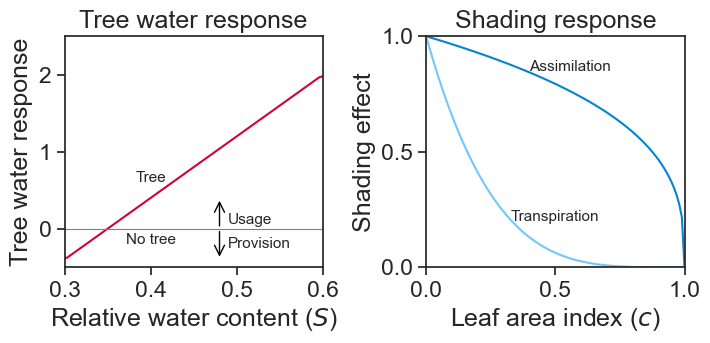

In [1]:
def get_hls(color):
    """
    Returns the HLS values of a given color.
    
    Args:
        color (str or tuple): A color name (e.g., 'xkcd:hot pink', 'tab:orange'), a hex code (e.g., '#FF69B4'), or an RGB triplet (e.g., (255, 105, 180)).
    
    Returns:
        tuple: A tuple containing the HLS values (hue, lightness, saturation) of the given color.
    """
    try:
        # Convert the input color to RGB
        if isinstance(color, str):
            # If the input is a color name, convert it to RGB
            rgb = mcolors.to_rgb(color)
        elif isinstance(color, tuple) and len(color) == 3:
            # If the input is an RGB triplet, use it directly
            rgb = color
        else:
            # If the input is a hex code, convert it to RGB
            rgb = mcolors.to_rgb(color)
        
        # Convert RGB to HSL
        r, g, b = rgb
        hls = colorsys.rgb_to_hls(r, g, b)
        
        return hls
    
    except ValueError as e:
        print(f"Error: {e}")
        return None

def get_hls2(color):
    """
    Returns the HLS values of a given color.
    
    Args:
        color (str or tuple): A color name (e.g., 'xkcd:hot pink', 'tab:orange'), a hex code (e.g., '#FF69B4'), or an RGB triplet (e.g., (255, 105, 180)).
    
    Returns:
        tuple: A tuple containing the HLS values (hue, lightness, saturation) of the given color.
    """
    try:
        # Convert the input color to RGB
        if isinstance(color, str):
            # If the input is a color name, convert it to RGB
            rgb = mcolors.to_rgb(color)
            rgb = [int(val * 255) for val in rgb]
        elif isinstance(color, tuple) and len(color) == 3:
            # If the input is an RGB triplet, use it directly
            rgb = color
        else:
            # If the input is a hex code, convert it to RGB
            rgb = mcolors.to_rgb(color)
            rgb = [int(val * 255) for val in rgb]
        
        # Convert RGB to HSL
        r, g, b = rgb
        hls = colorsys.rgb_to_hls(r / 255, g / 255, b / 255)
        
        return hls
    
    except ValueError as e:
        print(f"Error: {e}")
        return None

def new_range(l):
    r = np.arange(-1.0, 1.1, 0.1) + l
    return r[(r<=1.0) & (r>=0.0)]

def rgb_to_hex(rgb):
    return '#{:02x}{:02x}{:02x}'.format(int(rgb[0]*255), int(rgb[1]*255), int(rgb[2]*255))

def plot_panel(c, type, ax):
    """
    type=0 : hue
    type=1 : lightness
    type=2 : saturation
    """
    r = new_range(c[type])
    if type == 0:
        a_rgb = [colorsys.hls_to_rgb( *((ri, c[1], c[2]) ) ) for ri in r]
        type_name = "hue"
    if type == 1:
        a_rgb = [colorsys.hls_to_rgb( *((c[0], ri, c[2]) ) ) for ri in r]
        type_name = "lightness"
    if type == 2:
        a_rgb = [colorsys.hls_to_rgb( *((c[0], c[1], ri) ) ) for ri in r]
        type_name = "saturation"
    a_hex = [rgb_to_hex(i) for i in a_rgb]
    ax[type].imshow([a_rgb], interpolation='none')
    # Minor ticks
    ax[type].set_xticks(np.arange(-.5, len(a_rgb), 1), minor=True)
    # Gridlines based on minor ticks
    ax[type].grid(which='minor', color='w', linestyle='-', linewidth=2)
    # Remove minor ticks
    ax[type].tick_params(which='minor', bottom=False, left=False)

    ax[type].set_xticks(np.arange(len(a_rgb)))
    ax[type].set_xticklabels(a_hex, rotation=30);
    ax[type].set_yticks([])
    ax[type].text(1.02, 0.5, type_name, transform=ax[type].transAxes,
         horizontalalignment='left', verticalalignment='center',
         fontweight="bold")
    mask = np.abs(r-c[type])< 1.0e-8
    idx = np.argwhere(mask)
    ax[type].plot(idx[0], [0], marker='o', markersize=20, markerfacecolor='None', markeredgecolor="white")
    return a_hex

def pallete(color_name):
    fig, ax = plt.subplots(3, 1, figsize=(10,6))
    c = get_hls(color_name)
    hex_codes = plot_panel(c, 0, ax)
    print("hue array:\n", hex_codes)
    hex_codes = plot_panel(c, 1, ax)
    print("lightness array:\n", hex_codes)
    hex_codes = plot_panel(c, 2, ax)
    print("saturation array:\n", hex_codes)
    ax[0].set_title("color = " + color_name)
    return fig

In [ ]:
pallete('#d10333');
